In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('application_data.csv')

In [5]:
df_cleaned = df.dropna()

In [8]:
le = LabelEncoder()
for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Split the data into features and target variable
X = df_cleaned.drop(columns=['TARGET'])
y = df_cleaned['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Accuracy: 0.9453805926786751
Random Forest Accuracy: 0.9453805926786751
Support Vector Machine Accuracy: 0.9453805926786751


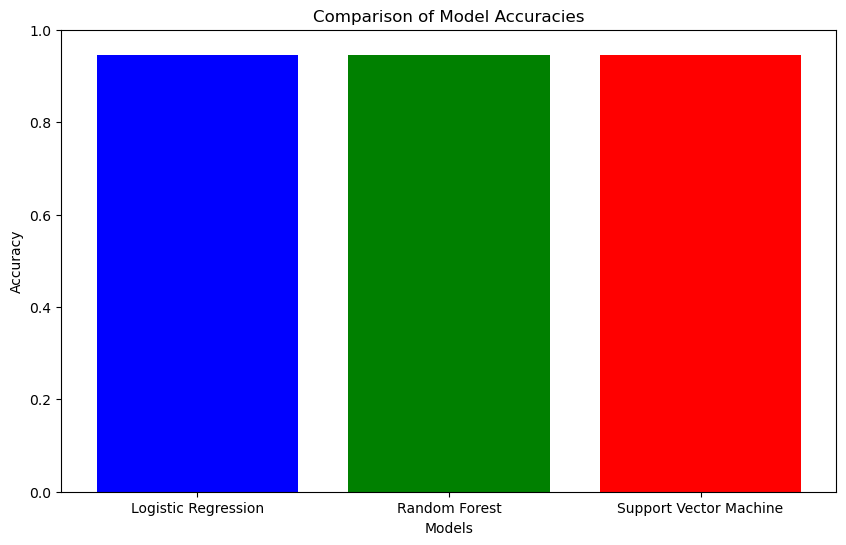

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('application_data.csv')

# Remove rows with missing values
df_cleaned = df.dropna().copy()  # Ensure we're working with a copy of the DataFrame

# Encode categorical variables
le = LabelEncoder()
for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Split the data into features and target variable
X = df_cleaned.drop(columns=['TARGET'])
y = df_cleaned['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_regression = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=100)
svm = SVC()

# Train models
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predictions
y_pred_lr = logistic_regression.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print accuracies
print("Logistic Regression Accuracy:", accuracy_lr)
print("Random Forest Accuracy:", accuracy_rf)
print("Support Vector Machine Accuracy:", accuracy_svm)

# Plotting the results
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine']
accuracies = [accuracy_lr, accuracy_rf, accuracy_svm]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set the y-axis limit to range from 0 to 1
plt.show()